## Data Visualization

In [1]:
# Matplotlib backend, artist

import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)

ax = fig.add_subplot(111)

ax.hist(x, 100)

ax.set_title("Normal distribution with $\mu=0, \sigma=1$")
fig.savefig("matplotlib_histogram.png")


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-auhkxa6s because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


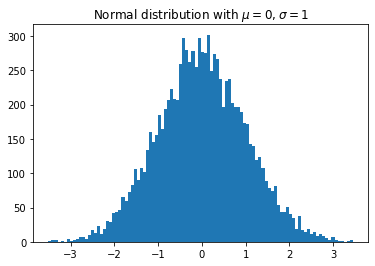

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig("matplotlib_histogram.png")
plt.show()


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8evt2ud6 because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


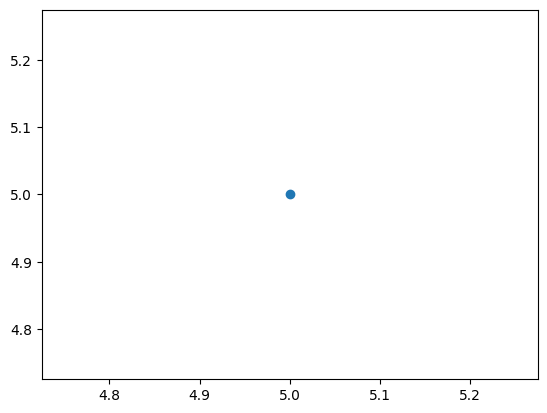

In [5]:
import matplotlib.pyplot as plt
plt.plot(5, 5, "o")
plt.show()


In [1]:
import numpy as np
import pandas as pd
# from __future__ import print_function

df_can = pd.read_excel("./files/Canada.xlsx", sheet_name="Canada by Citizenship",
                       skiprows=range(20), skipfooter=2)


In [2]:
df_can.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
df_canada = df_can.set_index("OdName")
df_canada.rename(columns={"OdName": "Country"})
df_canada["Total"] = df_canada.iloc[:, 8:].sum(axis=1)


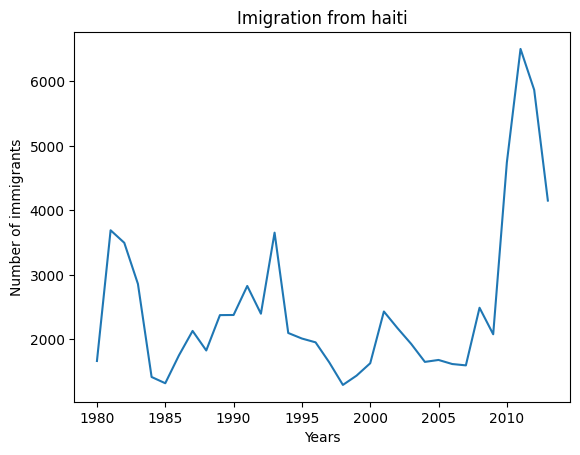

In [11]:
# df_canada
years = list(map(int, range(1980, 2014)))
df_canada.loc["Haiti", years].plot()
plt.title("Imigration from haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")
plt.show()


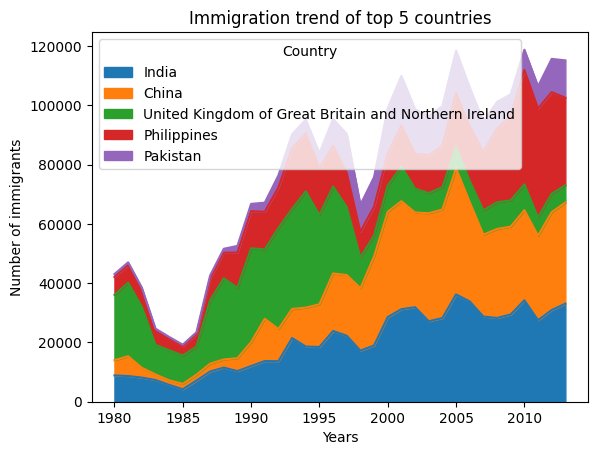

In [24]:
# Area chart

years = list(map(int, range(1980, 2014)))
df_canada1 = df_can.rename(columns={"OdName": "Country"})
df_canada1 = df_canada1.set_index("Country")
df_canada1["Total"] = df_canada1.iloc[:, 8:].sum(axis=1)
df_canada1.sort_values(["Total"], ascending=False, axis=0, inplace=True)
df_top5 = df_canada1.head()
df_top5 = df_top5[years].transpose()
df_top5.plot(kind="area")
plt.title("Immigration trend of top 5 countries")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")
plt.show()

Text(0, 0.5, 'Number of Countries')

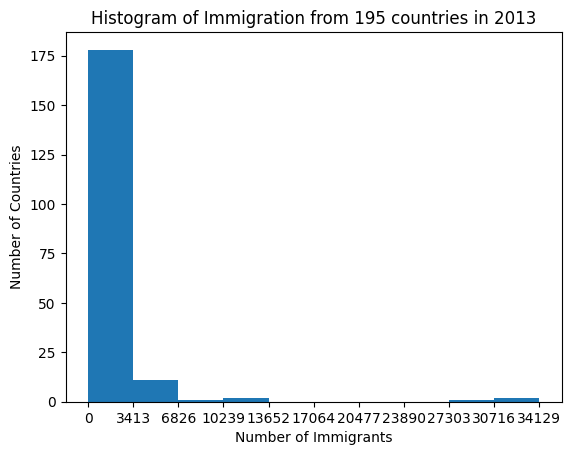

In [29]:
# Histogram chart
years = list(map(int, range(1980, 2014)))
df_canada2 = df_can.rename(columns={"OdName": "Country"})
df_canada2 = df_canada2.set_index("Country")
df_canada2["Total"] = df_canada2.iloc[:, 8:].sum(axis=1)

count, bin_edges = np.histogram(df_canada2[2013])

df_canada2[2013].plot(kind="hist", xticks = bin_edges)
plt.title("Histogram of Immigration from 195 countries in 2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Countries")

Text(0, 0.5, 'Number of immigrants')

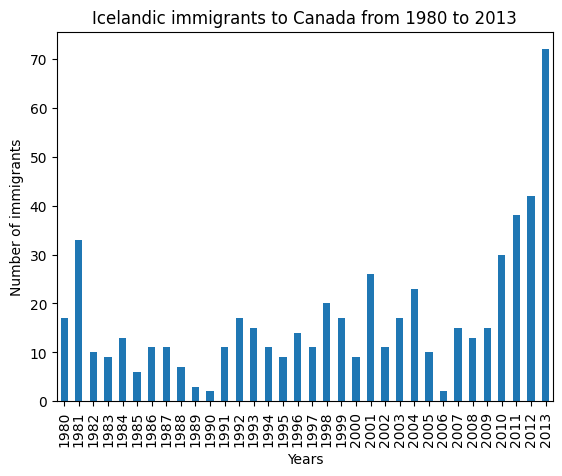

In [32]:
# Bar chart
years = list(map(int, range(1980, 2014)))
df_canada3 = df_can.rename(columns={"OdName": "Country"})
df_canada3 = df_canada3.set_index("Country")
df_canada3["Total"] = df_canada3.iloc[:, 8:].sum(axis=1)

df_iceland = df_canada3.loc["Iceland", years]
df_iceland.plot(kind="bar")
plt.title("Icelandic immigrants to Canada from 1980 to 2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")